In [4]:
import sys
sys.path.append('/home/ljq/code/MOO')  # 添加项目根目录到搜索路径
from Object.EnginConstraint.EC import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata
from Object.EnginConstraint import EC




L1=5.0*10**8
L2=10.0*10**9
dL=1.0*10**8
l1=200.0
l2=1600.0
dl=20.0

x = np.arange(L1,L2,dL)
y = np.arange(l1,l2,dl) 


armlength=np.arange(L1,L2,dL)
wavelength=np.arange(l1,l2,dl) 

#导入数据
SNRlist=np.loadtxt('/home/ljq/code/MOO/results/SNR/EMRI/SNR_EMRI3.txt')#SNR EMRI
# redshift1=np.loadtxt(r'redshift1.txt')
# redshift2=np.loadtxt(r'redshift2.txt')
# redshift3=np.loadtxt(r'redshift3.txt')
# redshift4=np.loadtxt(r'redshift4.txt')
# redshift5=np.loadtxt(r'redshift5.txt')
#redshift=np.row_stack((redshift1,redshift2,redshift3,redshift4,redshift5))
redshift=np.loadtxt('/home/ljq/code/MOO/results/redshift/EMRI/redshift_EMRI3.txt')#redshift EMRI
redshift_binary=np.loadtxt('/home/ljq/code/MOO/results/redshift/binary/redshift_binary_3.txt')

SNR_binray=np.loadtxt('/home/ljq/code/MOO/results/SNR/binary/SNR_binary3.txt')#SNR binary



95
95


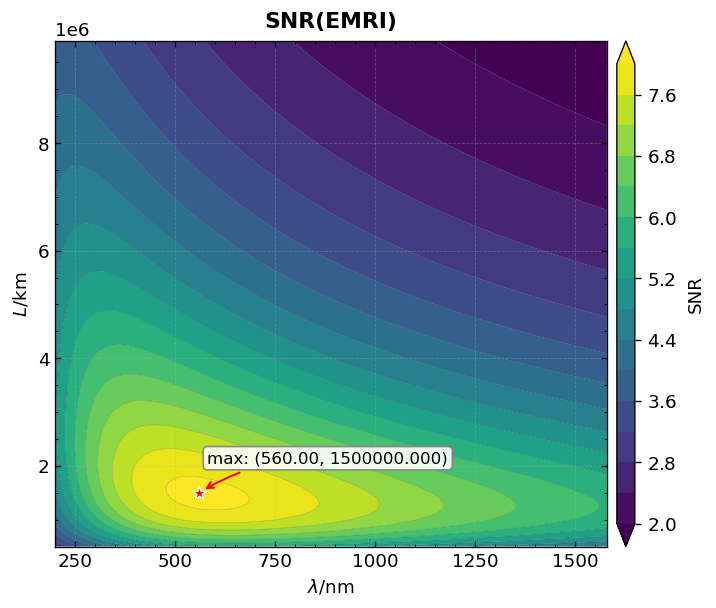

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter

# ================== 可调项 ==================
SMOOTH = False           # 是否对U做轻微平滑（演示图更顺滑；论文中慎用）
SMOOTH_SIGMA = 0.8       # 高斯平滑强度（sigma）
N_LEVELS = 20            # 等值线层数
CMAP = 'viridis'         # 颜色映射

# ------------------- SNR(EMRI) 等值线图 -------------------
z = SNRlist  # 与上面代码的 U 类似，这里用 z 表示 SNR 网格

print(len(x))
print(z.shape[0])

# 计算极值点索引
imax, jmax = np.unravel_index(np.argmax(z), z.shape)
# 注意：x 以 m 为单位，这里转换成 km 以与坐标轴一致
max_L_km = x[imax] / 1000.0
max_lambda_nm = y[jmax]

# 构网格（与上面保持一致：z.shape = (len(x), len(y))，所以 meshgrid(y, x)）
yy, xx = np.meshgrid(y, x)   # yy: λ (nm)，xx: L (m)
xx_km = xx / 1000.0          # y 轴以 km 显示

# Matplotlib 全局风格（如上段已设置可省略）
plt.rcParams.update({
    'figure.dpi': 120,
    'savefig.dpi': 300,
    'font.size': 11,
    'axes.titleweight': 'semibold',
})

fig, ax = plt.subplots(figsize=(6.2, 5.2))

# 填色等值线（保持原来 levels=20 与 cmap='viridis' 不变）
cf = ax.contourf(yy, xx_km, z, levels=20,
                 cmap='viridis', extend='both', antialiased=True)

# 叠加细实线轮廓，增强层间对比
cs = ax.contour(yy, xx_km, z, levels=20,
                colors='k', linewidths=0.25, alpha=0.35)

# 颜色条
cbar = fig.colorbar(cf, ax=ax, pad=0.015, aspect=28)
cbar.set_label('SNR', labelpad=6)

# 颜色条刻度格式（紧凑科学计数法）
sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((-2, 3))
cbar.ax.yaxis.set_major_formatter(sf)

# 极值点：星形+白描边
ax.scatter(max_lambda_nm, max_L_km, s=70, marker='*',
           facecolor='red', edgecolor='white', linewidth=0.8, zorder=5)

# 极值标注，使用像素偏移，适配不同坐标尺度
ax.annotate(
    f'max: ({max_lambda_nm:.2f}, {max_L_km:.3f})',
    xy=(max_lambda_nm, max_L_km),
    xytext=(5, 18),
    textcoords='offset points',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='0.5', alpha=0.9),
    arrowprops=dict(arrowstyle='->', color='red', lw=1.2,
                    shrinkA=4, shrinkB=4, connectionstyle='arc3,rad=0.15')
)

# 轴标签与标题
ax.set_title('SNR(EMRI)', pad=8)
ax.set_xlabel(r'$\lambda$/nm')
ax.set_ylabel(r'$L$/km')

# y 轴刻度为整刻度，x 轴也尽量整
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, prune=None, integer=True))
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))

# 网格与刻度样式
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.35)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)

# 边距紧凑
fig.tight_layout()

# 保存（保持原来的输出路径和格式）
fig.savefig('/home/ljq/code/MOO/results/Figure/new/SNRlist.png',
            bbox_inches='tight')

plt.show()


(95, 70)


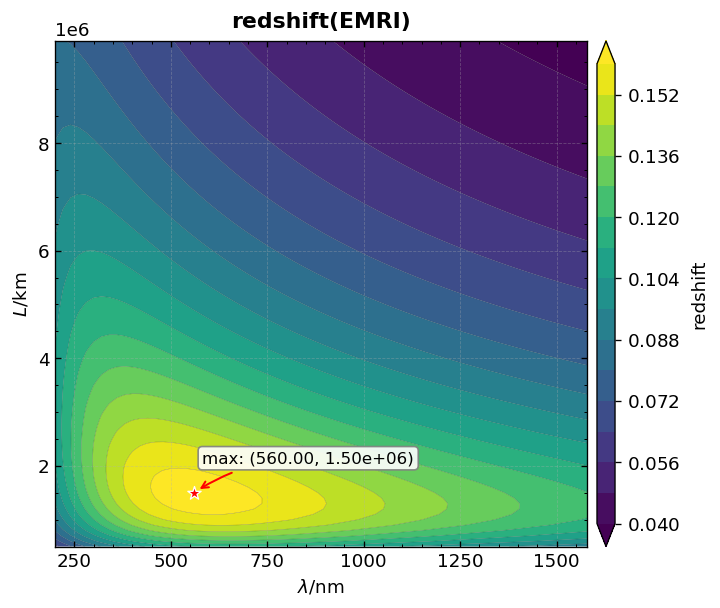

In [6]:
z = redshift
print(z.shape)

# ------------------- 网格参数 -------------------
L1 = 5.0e8
L2 = 1.0e10
dL = 1.0e8

l1 = 200.0
l2 = 1600.0
dl = 20.0

# 一维坐标（与原代码保持完全一致）
x = np.arange(L1, L2, dL)   # 臂长，单位 m
y = np.arange(l1, l2, dl)   # 波长，单位 nm
x=x/1e3
# 构网格；注意 z.shape = (len(x), len(y))，因此 meshgrid(y, x)
yy, xx = np.meshgrid(y, x)  # yy: λ (nm), xx: L (m)

# ------------------- 极值点 -------------------
imax, jmax = np.unravel_index(np.argmax(z), z.shape)
max_L_m = x[imax]
max_lambda_nm = y[jmax]

# ------------------- 画图风格设置 -------------------
plt.rcParams.update({
    'figure.dpi': 120,
    'savefig.dpi': 300,
    'font.size': 11,
    'axes.titleweight': 'semibold',
})

fig, ax = plt.subplots(figsize=(6.2, 5.2))

# 填色等值线（保持原来 levels=20, cmap='viridis'）
cf = ax.contourf(yy, xx, z,
                 levels=20,
                 cmap='viridis',
                 extend='both',
                 antialiased=True)

# 细实线轮廓，增强层间对比
cs = ax.contour(yy, xx, z,
                levels=20,
                colors='k',
                linewidths=0.25,
                alpha=0.35)

# 颜色条
cbar = fig.colorbar(cf, ax=ax, pad=0.015, aspect=28)
cbar.set_label('redshift', labelpad=6)

# 颜色条刻度格式（紧凑科学计数法）
sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((-2, 3))
cbar.ax.yaxis.set_major_formatter(sf)

# ------------------- 极值点标记 -------------------
ax.scatter(max_lambda_nm, max_L_m,
           s=70, marker='*',
           facecolor='red', edgecolor='white',
           linewidth=0.8, zorder=5)

ax.annotate(
    f'max: ({max_lambda_nm:.2f}, {max_L_m:.2e})',
    xy=(max_lambda_nm, max_L_m),
    xytext=(5, 18),  # 像素偏移，适配不同坐标尺度
    textcoords='offset points',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='0.5', alpha=0.9),
    arrowprops=dict(arrowstyle='->', color='red', lw=1.2,
                    shrinkA=4, shrinkB=4, connectionstyle='arc3,rad=0.15')
)

# ------------------- 轴标签与标题 -------------------
ax.set_title('redshift(EMRI)', pad=8)
ax.set_xlabel(r'$\lambda$/nm')
ax.set_ylabel(r'$L$/km')

# y 轴刻度尽量为整刻度，x 轴也尽量整
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))

# 网格 & 刻度风格
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.35)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)

# 布局紧凑
fig.tight_layout()

# 保存（保持原路径）
fig.savefig('/home/ljq/code/MOO/results/Figure/new/redshift.png',
            bbox_inches='tight')

plt.show()


95
95


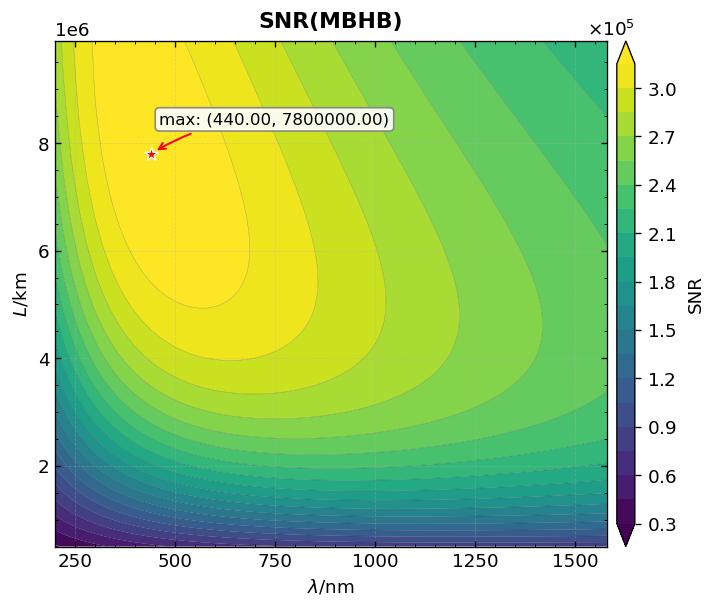

In [7]:
# ------------------- SNR(MBHB) 等值线图 -------------------
z = SNR_binray
print(len(x))
print(z.shape[0])

# ------------------- 网格参数 -------------------
L1 = 5.0e8
L2 = 1.0e10
dL = 1.0e8

l1 = 200.0
l2 = 1600.0
dl = 20.0

# 一维坐标（保持和原代码一致：x 转成 km）
x = np.arange(L1, L2, dL)   # m
y = np.arange(l1, l2, dl)   # nm
x_km = x / 1e3              # km

# 构网格；注意 z.shape = (len(x_km), len(y))
yy, xx = np.meshgrid(y, x_km)   # yy: λ (nm), xx: L (km)

# ------------------- 极值点 -------------------
max_idx = np.argmax(z)
imax, jmax = np.unravel_index(max_idx, z.shape)

max_L_km = x_km[imax]
max_lambda_nm = y[jmax]

# ------------------- 画图风格设置 -------------------
plt.rcParams.update({
    'figure.dpi': 120,
    'savefig.dpi': 300,
    'font.size': 11,
    'axes.titleweight': 'semibold',
})

fig, ax = plt.subplots(figsize=(6.2, 5.2))

# 填色等值线（保持原来 levels=20, cmap='viridis'）
cf = ax.contourf(yy, xx, z,
                 levels=20,
                 cmap='viridis',
                 extend='both',
                 antialiased=True)

# 细实线轮廓，增强层间对比
cs = ax.contour(yy, xx, z,
                levels=20,
                colors='k',
                linewidths=0.25,
                alpha=0.35)

# 颜色条
cbar = fig.colorbar(cf, ax=ax, pad=0.015, aspect=28)
cbar.set_label('SNR', labelpad=6)

# 颜色条刻度格式：科学计数法更紧凑
sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((-2, 3))
cbar.ax.yaxis.set_major_formatter(sf)

# ------------------- 极值点标记 -------------------
ax.scatter(max_lambda_nm, max_L_km,
           s=70, marker='*',
           facecolor='red', edgecolor='white',
           linewidth=0.8, zorder=5)

ax.annotate(
    f'max: ({max_lambda_nm:.2f}, {max_L_km:.2f})',
    xy=(max_lambda_nm, max_L_km),
    xytext=(5, 18),  # 像素偏移
    textcoords='offset points',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='0.5', alpha=0.9),
    arrowprops=dict(arrowstyle='->', color='red', lw=1.2,
                    shrinkA=4, shrinkB=4, connectionstyle='arc3,rad=0.15')
)

# ------------------- 轴标签与标题 -------------------
ax.set_title('SNR(MBHB)', pad=8)
ax.set_xlabel(r'$\lambda$/nm')
ax.set_ylabel(r'$L$/km')

# 刻度：尽量为整刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))

# 网格 & 刻度样式
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.35)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)

# 布局紧凑
fig.tight_layout()

# 保存（保持原路径）
fig.savefig('/home/ljq/code/MOO/results/Figure/new/SNR for binary.png',
            bbox_inches='tight')

plt.show()


95
95


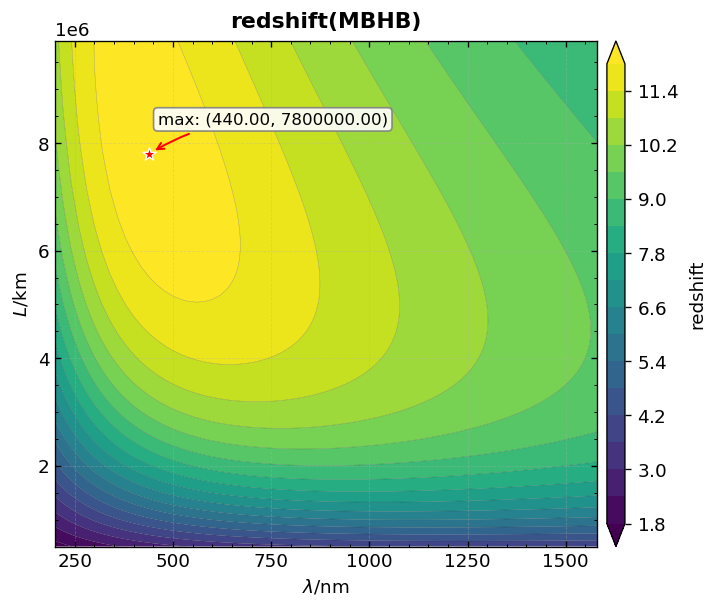

In [8]:
z = redshift_binary

# ------------------- 网格参数 -------------------
L1 = 5.0e8
L2 = 1.0e10
dL = 1.0e8

l1 = 200.0
l2 = 1600.0
dl = 20.0

# 一维坐标：物理上先用 m，绘图用 km
x = np.arange(L1, L2, dL)   # 臂长, m
y = np.arange(l1, l2, dl)   # 波长, nm
x_km = x / 1e3              # 用 km 作为纵轴单位

print(len(x_km))
print(z.shape[0])

# ------------------- 极值点 -------------------
max_idx = np.argmax(z)
imax, jmax = np.unravel_index(max_idx, z.shape)

max_L_km = x_km[imax]
max_lambda_nm = y[jmax]

# ------------------- 网格（与 z.shape 对应： (len(x_km), len(y)) ） -------------------
yy, xx = np.meshgrid(y, x_km)   # yy: λ (nm), xx: L (km)

# ------------------- 画图风格设置 -------------------
plt.rcParams.update({
    'figure.dpi': 120,
    'savefig.dpi': 300,
    'font.size': 11,
    'axes.titleweight': 'semibold',
})

fig, ax = plt.subplots(figsize=(6.2, 5.2))

# 填色等值线（保持原来 levels=20, cmap='viridis'）
cf = ax.contourf(yy, xx, z,
                 levels=20,
                 cmap='viridis',
                 extend='both',
                 antialiased=True)

# 叠加细实线轮廓，增强层间对比
cs = ax.contour(yy, xx, z,
                levels=20,
                colors='k',
                linewidths=0.25,
                alpha=0.35)

# 颜色条
cbar = fig.colorbar(cf, ax=ax, pad=0.015, aspect=28)
cbar.set_label('redshift', labelpad=6)

# 颜色条刻度格式（科学计数法，紧凑）
sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((-2, 3))
cbar.ax.yaxis.set_major_formatter(sf)

# ------------------- 极值点标记 -------------------
ax.scatter(max_lambda_nm, max_L_km,
           s=70, marker='*',
           facecolor='red', edgecolor='white',
           linewidth=0.8, zorder=5)

ax.annotate(
    f'max: ({max_lambda_nm:.2f}, {max_L_km:.2f})',
    xy=(max_lambda_nm, max_L_km),
    xytext=(5, 18),  # 像素偏移，更稳
    textcoords='offset points',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='0.5', alpha=0.9),
    arrowprops=dict(arrowstyle='->', color='red', lw=1.2,
                    shrinkA=4, shrinkB=4, connectionstyle='arc3,rad=0.15')
)

# ------------------- 轴标签与标题 -------------------
ax.set_title('redshift(MBHB)', pad=8)
ax.set_xlabel(r'$\lambda$/nm')
ax.set_ylabel(r'$L$/km')

# 刻度：尽量整刻度
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))

# 网格 & 刻度样式
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.35)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)

# 布局紧凑
fig.tight_layout()

# 保存（保持原路径）
fig.savefig('/home/ljq/code/MOO/results/Figure/new/redshift for binary.png',
            bbox_inches='tight')

plt.show()


In [6]:
# import numpy as np

# # 第一个数组的踩点
# L1_1, L2_1, dL_1 = 1 * 10**8, 10 * 10**9, 1 * 10**8
# l1_1, l2_1, dl_1 = 200, 1200, 50
# x1 = np.arange(L1_1, L2_1, dL_1)
# y1 = np.arange(l1_1, l2_1, dl_1)

# # 第二个数组的踩点
# L1_2, L2_2, dL_2 = 5 * 10**8, 10 * 10**9, 5 * 10**8
# l1_2, l2_2, dl_2 = 200, 1200, 100
# x2 = np.arange(L1_2, L2_2, dL_2)
# y2 = np.arange(l1_2, l2_2, dl_2)

# # 生成网格点
# grid_x1, grid_y1 = np.meshgrid(y1, x1)
# grid_x2, grid_y2 = np.meshgrid(y2, x2)

# # 找到第一个数组中与第二个数组重叠的点
# mask = np.isin(grid_x1, y2) & np.isin(grid_y1, x2)
# print(mask.shape)
# # 提取第一个数组中与第二个数组重叠的部分
# overlap_x1 = grid_x1[mask]
# overlap_y1 = grid_y1[mask]
# valid_rows = np.any(mask, axis=1)  # 行筛选条件
# valid_cols = np.any(mask, axis=0)  # 列筛选条件


In [9]:
L1_2, L2_2, dL_2 = 5.0 * 10**8, 10.0 * 10**9, 1.0 * 10**8
l1_2, l2_2, dl_2 = 200.0, 1600.0, 20.0
x2 = np.arange(L1_2, L2_2, dL_2)
y2 = np.arange(l1_2, l2_2, dl_2)
xi, yi = np.meshgrid(y2, x2)
num=6
w=np.arange(1,num+1)
print(w)
w=2*(len(w)-w+1)/len(w)/(len(w)+1)
print(w)
z = np.zeros((num, len(x2), len(y2)))

[1 2 3 4 5 6]
[0.28571429 0.23809524 0.19047619 0.14285714 0.0952381  0.04761905]


In [10]:
import sys
sys.path.append('/home/ljq/code/MOO')  # 添加项目根目录到搜索路径
from Object.EnginConstraint.EC import *
EC_lambda=EC_l2(y2,1064,100,len(x2))
from Object.EnginConstraint.PB import *
PB_L=payload_matrix(len(y2),x2)


In [9]:
# print(PB_L[:,0])
# is_monotonic = np.all(np.diff(PB_L, axis=0) >= 0) or np.all(np.diff(PB_L, axis=1) >= 0)
# print(f"Is PB_L monotonic? {is_monotonic}")

In [10]:
# z=PB_L/np.amax(PB_L)
# L1=5*10**8
# L2=10*10**9
# dL=5*10**8
# l1=200
# l2=1200
# dl=100

# x = np.arange(L1,L2,dL)
# y = np.arange(l1,l2,dl) 
# print(len(x))
# print(z.shape[0])
# max_idx1 = np.argmax(z)

# max_L1=x[np.unravel_index(max_idx1, z.shape)[0]]
# max_l1 =y[np.unravel_index(max_idx1, z.shape)[1]]


# xi, yi = np.meshgrid(y, x)

# plt.contourf(xi, yi, z, 20, cmap='viridis') 
# plt.colorbar()  # 显示颜色条
# #plt.legend(loc='upper right')
# plt.scatter(max_l1, max_L1, color='red', s=50)  # 在最小值点上绘制一个红色的圆点
# plt.annotate(f'max: ({max_l1:.2f}, {max_L1:.2f})', xy=(max_l1, max_L1), xytext=(max_l1-1, max_L1+0.005),
#               arrowprops=dict(facecolor='red', shrink=0.05))#在等高线图的最高点用箭头指出 

In [11]:
print(SNRlist.shape)
z[0] = SNRlist / np.amax(SNRlist)
z[1] = redshift / np.amax(redshift)
z[2] = SNR_binray / np.amax(SNR_binray)
z[3] = redshift_binary / np.amax(redshift_binary)
z[4] = EC_lambda / np.amax(EC_lambda)
z[5] = np.sqrt(1-PB_L / np.amax(PB_L))


(95, 70)


In [12]:
testmatrix=[[0,1,2,3,4,5],
            [1,2,3,4,5,0],
            [2,3,4,5,0,1],
            [3,4,5,0,1,2],
            [4,5,0,1,2,3],
            [5,0,1,2,3,4]]
testmatrix=np.array(testmatrix)
testmatrix=testmatrix*testmatrix
print(testmatrix)


[[ 0  1  4  9 16 25]
 [ 1  4  9 16 25  0]
 [ 4  9 16 25  0  1]
 [ 9 16 25  0  1  4]
 [16 25  0  1  4  9]
 [25  0  1  4  9 16]]


In [12]:
z[0] = np.array(z[0])**2
z[1] = np.array(z[1])**2
z[2] = np.array(z[2])**2
z[3] = np.array(z[3])**2
z[4] = np.array(z[4])**2
z[5] = np.array(z[5])**2


In [14]:
# plt.plot(armlength,SNRlist/np.max(SNRlist))
# plt.plot(armlength,redshift/np.max(redshift))
# plt.plot(armlength,Comp1/max_y3)
# plt.plot(armlength,Comp2/max_y4)
# plt.show()

In [13]:
#判断相同
def equ(y1, y2):
    return int(np.array_equal(y1, y2))

#判断占优
def Opt(y1, y2):
    return int(np.all(np.less(y1, y2)))





# 生成三个高斯波包的二维矩阵
def gaussian_2d(x, y, x0, y0, sigma):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

size = (10, 10)
x = np.linspace(0, 9, size[0])
y = np.linspace(0, 9, size[1])
x, y = np.meshgrid(x, y)

# 高斯波包的峰位置和标准差
peaks = [(3, 3), (6, 6), (8, 2)]
sigma = 1.0

test1 = gaussian_2d(x, y, peaks[0][0], peaks[0][1], sigma)
test2 = gaussian_2d(x, y, peaks[1][0], peaks[1][1], sigma)
test3 = gaussian_2d(x, y, peaks[0][0], peaks[0][1], sigma)/10
#print(test1,test2)
print(Opt(test3,test1),Opt(test3,test2))
#判断决策是否帕累托
def Pareto(L,l,z,xp,yp):
    j=1
    x,y=z[0].shape
    for i in np.arange(0,x,1):
        for k in np.arange(0,y,1):
            if Opt(z[:,i,k],z[:,xp,yp])==1 and equ(z[:,i,k],z[:,xp,yp])==0:
                j=0
        
    if j==1:
        return L[xp],l[yp]
    elif j==0:
        return None
def Pareto_field(L,l,z):
    seq=[]
    x,y=z[0].shape
    for i in np.arange(0,x,1):
        for j in np.arange(0,y,1):
            if Pareto(L,l,z,i,j)!=None:
                seq.append([i,j])
    seqtempL = [coord[0] for coord in seq]
    seqtempl = [coord[1] for coord in seq]
    return seq,seqtempL,seqtempl,L[seqtempL],l[seqtempl]
            

1 0


In [14]:
import numpy as np

# 生成三个相同大小的随机二维矩阵
matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)
matrix3 = np.random.rand(10, 10)

print("Matrix 1:\n", matrix1)
print("Matrix 2:\n", matrix2)
print("Matrix 3:\n", matrix3)
# 生成三个高斯波包的二维矩阵
def gaussian_2d(x, y, x0, y0, sigma):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

size = (10, 10)
x = np.linspace(0, 9, size[0])
y = np.linspace(0, 9, size[1])
x, y = np.meshgrid(x, y)

# 高斯波包的峰位置和标准差
peaks = [(3, 3), (6, 6), (8, 2)]
sigma = 1.0

gaussian_matrix1 = gaussian_2d(x, y, peaks[0][0], peaks[0][1], sigma)
gaussian_matrix2 = gaussian_2d(x, y, peaks[1][0], peaks[1][1], sigma)
gaussian_matrix3 = gaussian_2d(x, y, peaks[2][0], peaks[2][1], sigma)

print("Gaussian Matrix 1:\n", gaussian_matrix1)
print("Gaussian Matrix 2:\n", gaussian_matrix2)
print("Gaussian Matrix 3:\n", gaussian_matrix3)

Matrix 1:
 [[0.18347293 0.17884645 0.85725933 0.16289932 0.90020088 0.95291793
  0.15260255 0.17213807 0.74778177 0.57250266]
 [0.07208943 0.09292242 0.36419034 0.59075075 0.81940307 0.50557058
  0.66285651 0.26110529 0.10314275 0.74666653]
 [0.64008805 0.95631713 0.13748352 0.58883827 0.8043453  0.08785212
  0.72394006 0.94497607 0.73226184 0.20351894]
 [0.38601444 0.62635914 0.03627652 0.34318591 0.4538372  0.26243477
  0.61474015 0.14872493 0.20409114 0.74823669]
 [0.81852782 0.8871528  0.79895375 0.72958272 0.0392215  0.18577337
  0.3052735  0.11790534 0.47383136 0.20280435]
 [0.94566205 0.00288687 0.1623695  0.71013931 0.83765199 0.41664424
  0.53125458 0.96973224 0.84843556 0.64645794]
 [0.16318118 0.58489525 0.38884346 0.85691074 0.18652673 0.67465844
  0.87350104 0.67013402 0.37893062 0.89238481]
 [0.89458435 0.4623597  0.94011235 0.14635738 0.21174984 0.73806976
  0.22505421 0.72139844 0.04503682 0.72232632]
 [0.01782917 0.53139134 0.86338376 0.36673841 0.89984777 0.31379668
 

In [15]:
# print(Opt(y[2,:],y[3,:]))
# print(Pareto(armlength,y,17))
#test
seq=[]
seq.append([3,4])
seq.append([5,6])
seq.append([7,8])
print([list(x) for x in seq])
a=[coord[0] for coord in seq]
b=[coord[1] for coord in seq]
print(a,b)

[[3, 4], [5, 6], [7, 8]]
[3, 5, 7] [4, 6, 8]


In [16]:
L1_2, L2_2, dL_2 = 5.0 * 10**8, 10.0 * 10**9, 1.0 * 10**8
l1_2, l2_2, dl_2 = 200.0, 1600.0, 50.0

x = np.arange(L1, L2, dL)
y = np.arange(l1, l2, dl) 


idx, idxL, idxl, ParetoL, Paretol = Pareto_field(x, y, z)
xi, yi = np.meshgrid(y, x)


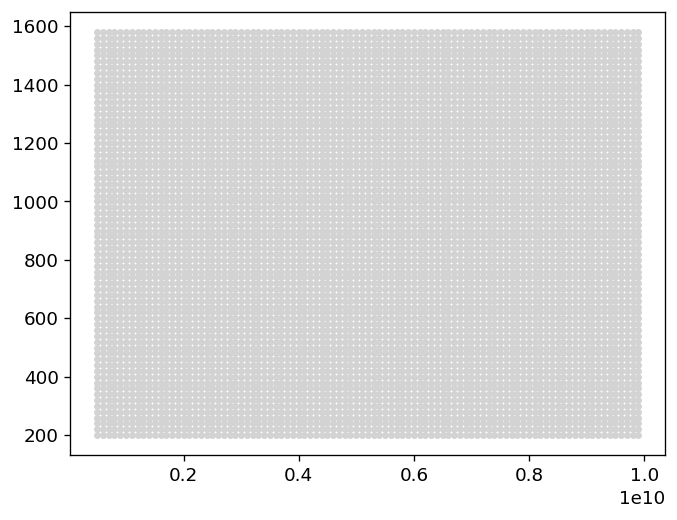

In [19]:
#绘制xi，yi散点图
plt.scatter(yi, xi, c='lightgray', s=10, label='All Points')

In [32]:
# L1_2, L2_2, dL_2 = 5.0 * 10**8, 10.0 * 10**9, 1.0 * 10**8
# l1_2, l2_2, dl_2 = 200.0, 1600.0, 50.0

# x = np.arange(L1, L2, dL)
# y = np.arange(l1, l2, dl) 


# idx, idxL, idxl, ParetoL, Paretol = Pareto_field(x, y, z)
# xi, yi = np.meshgrid(y, x)

# fig, axs = plt.subplots(2, 3, figsize=(10, 8))  # 创建一个2x3的子图布局

# 绘制不同的等高线图
# contourPlots = [axs[i // 2, i % 2].contourf(xi, yi, z[i], 20, alpha=0.5, cmap='viridis') for i in range(5)]
# labels = ['SNR', 'Redshift', 'SNR for binary', 'Redshift for binary','EC_lambda']

# # 为每个子图添加颜色图例
# for i, contourPlot in enumerate(contourPlots):
#     cbar = fig.colorbar(contourPlot, ax=axs[i // 2, i % 2])
#     cbar.set_label(labels[i])

# # 绘制帕累托最优点
# Pareto_Field = [(y[j], x[i]) for i, j in idx]
# for point in Pareto_Field:
#     axs[0, 0].scatter(*point, s=5,color='red')  # 只在第一个子图中绘制帕累托最优点

# # 添加图例和标签
# axs[0, 0].legend(['Pareto Field'], loc='upper right')
# axs[0, 0].set_xlabel('Armlength/m')
# axs[0, 0].set_ylabel('Wavelength/nm')

# plt.tight_layout()
# plt.show()


In [33]:

# # 动态创建子图
# fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# # 绘制等高线图
# for i in range(len(z)):
#     contourPlot = axs[i // 3, i % 3].contourf(xi, yi, z[i], 20, alpha=0.5, cmap='viridis')
#     cbar = fig.colorbar(contourPlot, ax=axs[i // 3, i % 3])
#     cbar.set_label(labels[i])
#     axs[i // 3, i % 3].set_title(labels[i])

# # 绘制帕累托最优点
# for point in Pareto_Field:
#     axs[0, 0].scatter(*point, s=10, color='red', edgecolor='black')

# # 添加全局布局调整
# plt.tight_layout()
# plt.show()

In [20]:
print(idx)

[[np.int64(0), np.int64(0)], [np.int64(0), np.int64(1)], [np.int64(0), np.int64(2)], [np.int64(1), np.int64(0)], [np.int64(1), np.int64(1)], [np.int64(2), np.int64(0)], [np.int64(2), np.int64(1)], [np.int64(3), np.int64(0)], [np.int64(3), np.int64(1)], [np.int64(4), np.int64(0)], [np.int64(4), np.int64(1)], [np.int64(5), np.int64(0)], [np.int64(5), np.int64(1)], [np.int64(6), np.int64(0)], [np.int64(7), np.int64(0)], [np.int64(8), np.int64(0)], [np.int64(9), np.int64(0)], [np.int64(10), np.int64(0)], [np.int64(11), np.int64(0)], [np.int64(12), np.int64(0)], [np.int64(13), np.int64(0)], [np.int64(14), np.int64(0)], [np.int64(15), np.int64(0)], [np.int64(16), np.int64(0)], [np.int64(17), np.int64(0)], [np.int64(18), np.int64(0)], [np.int64(19), np.int64(0)], [np.int64(20), np.int64(0)], [np.int64(21), np.int64(0)], [np.int64(22), np.int64(0)], [np.int64(23), np.int64(0)], [np.int64(23), np.int64(69)], [np.int64(24), np.int64(0)], [np.int64(24), np.int64(69)], [np.int64(25), np.int64(0)],

[1 2 3 4 5 6]
[0.28571429 0.23809524 0.19047619 0.14285714 0.0952381  0.04761905]


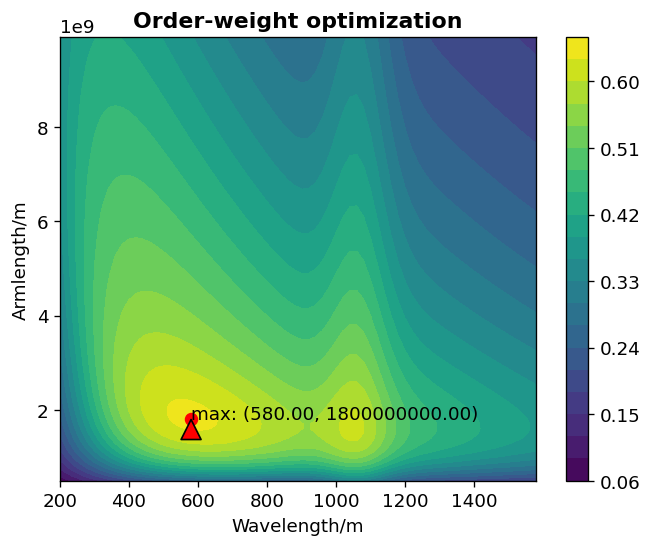

In [21]:
num=6
w=np.arange(1,num+1)
print(w)
w=2*(len(w)-w+1)/len(w)/(len(w)+1)
print(w)



U=np.zeros((len(x),len(y)))
for i in np.arange(0,5):
    U+=z[i,:,:]*w[i]

max_idx1 = np.argmax(U)

max_L1=x[np.unravel_index(max_idx1,U.shape)[0]]
max_l1 =y[np.unravel_index(max_idx1, U.shape)[1]]


xi, yi = np.meshgrid(y, x)

plt.contourf(xi, yi, U, 20, cmap='viridis') 
plt.colorbar()  # 显示颜色条
#plt.legend(loc='upper right')
plt.scatter(max_l1, max_L1, color='red', s=50)  # 在最小值点上绘制一个红色的圆点
plt.annotate(f'max: ({max_l1:.2f}, {max_L1:.2f})', xy=(max_l1, max_L1), xytext=(max_l1, max_L1),
              arrowprops=dict(facecolor='red', shrink=0.05))#在等高线图的最高点用箭头指出 
plt.title('Order-weight optimization')
plt.xlabel('Wavelength/m')
plt.ylabel('Armlength/m')
  
plt.savefig('/home/ljq/code/MOO/results/Figure/new/Order-weight optimization.png')

plt.show()



# arm=armlength
# max_idx = np.argmax(U)
# max_x, max_y = arm[max_idx], 100*U[max_idx]
# plt.plot(arm,100*U,label='Order-weight optimization')
# plt.grid(True)
# plt.legend(loc='lower right')
# plt.xlabel('Armlength[Gm]')
# plt.ylabel('Value[%]')
# plt.scatter(max_x, max_y, color='red', s=50)  # 在最大值点上绘制一个红色的圆点
# plt.annotate(f'max: ({max_x:.2f}, {max_y:.2f})', xy=(max_x, max_y), xytext=(max_x, max_y+0.05),arrowprops=dict(facecolor='red', shrink=0.5)) 
# plt.show()
# print(max_x)

In [22]:
# def RS(judge,w,f,y,para):
#     U=[]
#     for i in range(0,len(judge)):
#         if judge[i]:
#             U=np.append(U,y[i]*w)
#         elif (judge[i])!=True:
#             U=np.append(U,y[i]*f(w,para,y[i]))
#     return U

def RS(judge, w, f, y, para):
    # 使用 numpy 的 where 函数进行矢量化操作
    return np.where(judge, y * w, f(w, para, y))



[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429]


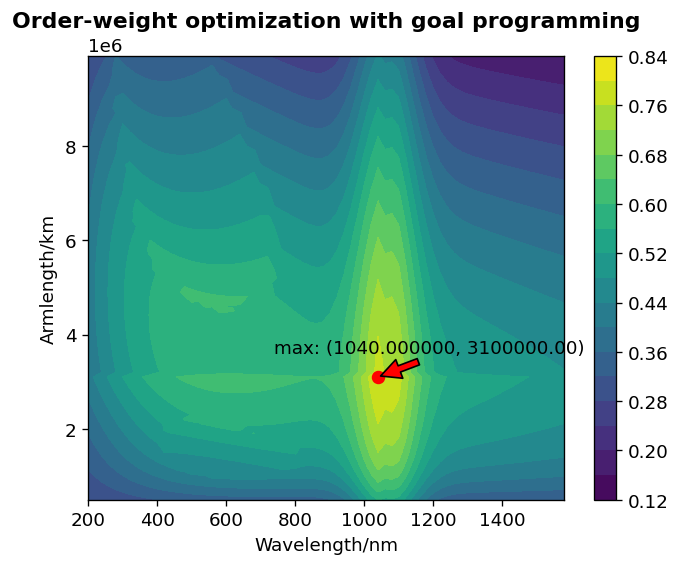

In [23]:
#多目标优化3目标规划法
w=[]
num=6
for i in range(1,num+1):
    w=np.append(w,2*(i)/(num*(num+1)))

print(w)
U=np.zeros((len(x),len(y)))

ob=np.array([0.9,0.9,0.9,0.9,0.9,0.9])
def Reduce(w,thshd,score):
    return np.exp(-score/thshd+1)*w
for i in range(0,len(ob)):
    judge=(z[i]<=ob[i]*np.amax(z[i]))
    U+=RS(judge,w[i],Reduce,z[i],ob[i]*np.amax(z[i]))
max_idx1 = np.argmax(U)

max_L1=x[np.unravel_index(max_idx1,U.shape)[0]]/1000
max_l1 =y[np.unravel_index(max_idx1, U.shape)[1]]


xi, yi = np.meshgrid(y, x)

plt.contourf(xi, yi/1000, U, 20, cmap='viridis') 
plt.colorbar()  # 显示颜色条
#plt.legend(loc='upper right')
plt.scatter(max_l1, max_L1, color='red', s=50)  # 在最小值点上绘制一个红色的圆点
plt.annotate(f'max: ({max_l1:2f}, {max_L1:.2f})', xy=(max_l1, max_L1), xytext=(max_l1-300, max_L1+0.5e6),
              arrowprops=dict(facecolor='red', shrink=0.05))#在等高线图的最高点用箭头指出 
plt.title('Order-weight optimization with goal programming')
plt.xlabel('Wavelength/nm')
plt.ylabel('Armlength/km')
  
plt.savefig('/home/ljq/code/MOO/results/Figure/new/Order-weight optimization with objective programming.png')

plt.show()

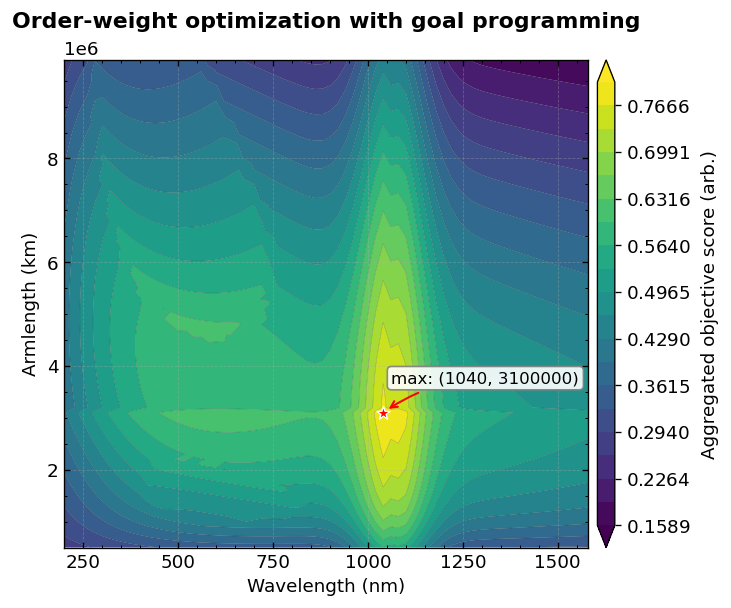

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter

# ================== 可调项 ==================
SMOOTH = False           # 是否对U做轻微平滑（演示图更顺滑；论文中慎用）
SMOOTH_SIGMA = 0.8       # 高斯平滑强度（sigma）
N_LEVELS = 20            # 等值线层数
CMAP = 'viridis'         # 颜色映射
TITLE = 'Order-weight optimization with goal programming'
CBAR_LABEL = 'Aggregated objective score (arb.)'
SAVE_PNG = '/home/ljq/code/MOO/results/Figure/new/Order-weight_optimization_goal_programming.png'
SAVE_PDF = '/home/ljq/code/MOO/results/Figure/new/Order-weight_optimization_goal_programming.pdf'
# ============================================

# ------- 你的权重/目标聚合逻辑（原样保留） -------
w = []
num = 6
for i in range(1, num + 1):
    w = np.append(w, 2 * (i) / (num * (num + 1)))
ob = np.array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

U = np.zeros((len(x), len(y)))

def Reduce(w, thshd, score):
    return np.exp(-score / thshd + 1) * w

for i in range(0, len(ob)):
    thr = ob[i] * np.amax(z[i])
    judge = (z[i] <= thr)
    U += RS(judge, w[i], Reduce, z[i], thr)

# 数值安全处理（可避免nan/inf破坏配色）
U = np.nan_to_num(U, nan=np.nanmin(U), posinf=np.nanmax(U), neginf=np.nanmin(U))

# 可选：轻微平滑（需要 SciPy）
if SMOOTH:
    try:
        from scipy.ndimage import gaussian_filter
        U = gaussian_filter(U, sigma=SMOOTH_SIGMA)
    except Exception as e:
        print("[Warn] 平滑未执行：", e)

# 计算极值点
imax, jmax = np.unravel_index(np.argmax(U), U.shape)
max_L_km = x[imax] / 1000.0
max_lambda_nm = y[jmax]

# 构网格（注意U.shape = (len(x), len(y))，所以 meshgrid(y, x)）
yy, xx = np.meshgrid(y, x)  # xx: 与 x 对应，yy: 与 y 对应
xx_km = xx / 1000.0         # y轴以km显示

# 等值线层级
u_min, u_max = float(np.nanmin(U)), float(np.nanmax(U))
levels = np.linspace(u_min, u_max, N_LEVELS)

# ------------------- 画图 -------------------
plt.rcParams.update({
    'figure.dpi': 120,
    'savefig.dpi': 300,
    'font.size': 11,
    'axes.titleweight': 'semibold',
})

fig, ax = plt.subplots(figsize=(6.2, 5.2))  # 比例略偏方，便于论文页宽
# 填色等值线
cf = ax.contourf(yy, xx_km, U, levels=levels, cmap=CMAP, extend='both', antialiased=True)

# 叠加细实线轮廓，增强层间对比
cs = ax.contour(yy, xx_km, U, levels=levels, colors='k', linewidths=0.25, alpha=0.35)

# 颜色条
cbar = fig.colorbar(cf, ax=ax, pad=0.015, aspect=28)
cbar.set_label(CBAR_LABEL, labelpad=6)

# 颜色条刻度格式（更紧凑）
sf = ScalarFormatter(useMathText=True)
sf.set_powerlimits((-2, 3))
cbar.ax.yaxis.set_major_formatter(sf)

# 极值点：星形+白描边，显眼
ax.scatter(max_lambda_nm, max_L_km, s=70, marker='*',
           facecolor='red', edgecolor='white', linewidth=0.8, zorder=5)

# 极值标注（以“点”为单位偏移，适配不同坐标尺度）
ax.annotate(
    f'max: ({max_lambda_nm:.0f}, {max_L_km:.0f})',
    xy=(max_lambda_nm, max_L_km),
    xytext=(5, 18),  # 像素点偏移，更好控
    textcoords='offset points',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.25', fc='white', ec='0.5', alpha=0.9),
    arrowprops=dict(arrowstyle='->', color='red', lw=1.2,
                    shrinkA=4, shrinkB=4, connectionstyle='arc3,rad=0.15')
)

# 轴标签与标题
ax.set_title(TITLE, pad=8)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Armlength (km)')

# y轴刻度为整刻度，x轴也尽量整
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, prune=None, integer=True))
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))

# 网格
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.35)
ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)

# 边距紧凑
fig.tight_layout()

# 保存（PNG & PDF）
fig.savefig(SAVE_PNG, bbox_inches='tight')
fig.savefig(SAVE_PDF, bbox_inches='tight')
plt.show()


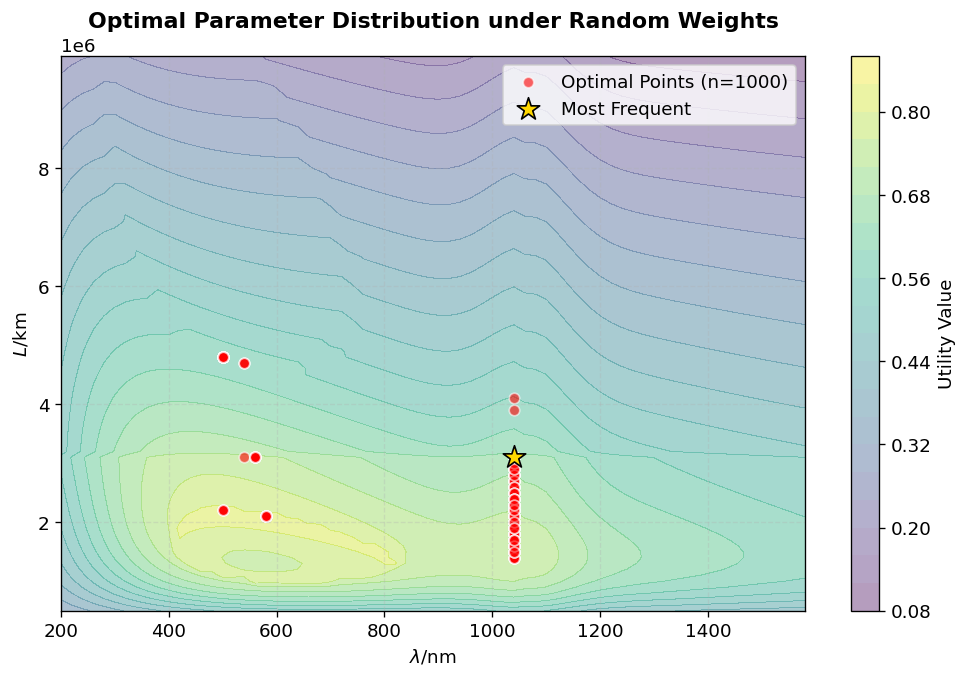

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# num 应与 ob 的长度一致
num = len(ob)  # 确保 num=6

# 初始化存储容器
max_points = []
best_U = None  # 保存最大效用对应的U矩阵
max_U_value = -np.inf  # 保存当前最大效用值
L1_2, L2_2, dL_2 = 5.0 * 10**5, 10.0 * 10**6, 1.0 * 10**5
l1_2, l2_2, dl_2 = 200.0, 1600.0, 20.0

x = np.arange(L1_2, L2_2, dL_2)
y = np.arange(l1_2, l2_2, dl_2) 
for _ in range(1000):
    # ==================================================================
    # (1) 生成随机归一化权重 (原有序权重改为随机)
    # ==================================================================
    w =1+5*np.random.rand(num)  # 生成[0,1)均匀分布随机数
    w /= np.sum(w)  # 归一化至总和为1
    
    # ==================================================================
    # (2) 重新计算当前权重下的效用矩阵U (与原逻辑一致但独立)
    # ==================================================================
    U = np.zeros((len(x), len(y)))  # 每次循环重置U
    
    # 假设 Reduce 和 RS 函数已正确定义
    for i in range(len(ob)):
        threshold = ob[i] * np.amax(z[i])
        judge = z[i] <= threshold
        
        U += RS(judge, w[i], Reduce, z[i], threshold)
    
    # ================================================================== 
    # (3) 记录当前最优解
    # ==================================================================
    idx = np.argmax(U)
    row_idx, col_idx = np.unravel_index(idx, U.shape)
    max_L = x[row_idx]  # Armlength
    max_l = y[col_idx]  # Wavelength
    max_points.append( (max_l, max_L) )
    
    # ==================================================================
    # (4) 更新最大效用对应的U矩阵（仅保留效用最高的那次）
    # ==================================================================
    current_max = U.max()
    if current_max > max_U_value:  # 找到更优解
        max_U_value = current_max
        best_U = U.copy()  # 必须拷贝，否则会被覆盖

# ======================================================================
# 可视化部分
# ======================================================================
x=x
xi, yi = np.meshgrid(y, x)  # 生成坐标网格

plt.figure(figsize=(10, 6))

# (A) 绘制最高效用对应的等高线 (不再是最后一次而是最高效用的那次)
contour = plt.contourf(xi, yi, best_U, 20, cmap='viridis', alpha=0.4)
plt.colorbar(contour, label='Utility Value')

# (B) 绘制所有最优解散点
max_points = np.array(max_points)
plt.scatter(
    max_points[:, 0], max_points[:, 1],
    c='red', edgecolor='white',
    s=40, alpha=0.6, 
    label=f'Optimal Points (n={len(max_points)})'
)

# (C) 可选：标注密集区域模式点
mode_result = mode(max_points, axis=0, keepdims=False)
if not mode_result.mode.size == 0:  # 检查是否存在众数
    mode_point = mode_result.mode
    plt.scatter(
        mode_point[0], mode_point[1],
        marker='*', s=200, edgecolors='black',
        facecolor='gold', label='Most Frequent'
    )

plt.xlabel('$\lambda$/nm')
plt.ylabel('$L$/km')
plt.title('Optimal Parameter Distribution under Random Weights')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

plt.savefig('/home/ljq/code/MOO/results/Figure/new/Random_weight_optimization.png')
plt.show()


In [40]:
#PSO寻优


In [41]:
#正交边界相交法
w=np.array([0.25,0.25,0.25,0.25])
y1=SNRlist/max_l1
y2=redshift/max_y2
y3=Comp1/max_y3
y4=Comp2/max_y4
maxy=np.row_stack((max(y1),max(y2),max(y3),max(y4)))
y=np.row_stack((y1,y2,y3,y4))
maxx_id=np.row_stack((max_idx1,max_idx2,max_idx3,max_idx4))
maxx=armlength[maxx_id]
Phi=np.zeros(len(y[:,1]))
V=maxy-y
for i in range(0,len(y[:,1])):
    temp=Phi
    Phi=np.column_stack((temp,V[:,maxx_id[i]]))
temp=Phi[0:(len(y[:,1])+1),1:(len(y[:,1])+2)]

Phi=temp
def NORM(l,u,v):
    sum=0
    for i in range(0,len(u)):
        sum+=(l*u[i]-v[i])*(l*u[i]-v[i])
    return np.sqrt(sum)
def Find_zero(f,a,b,x1,x2,e,iter):
    y=f(x1,a,b)
    i=0
    if f(x1,a,b)*f(x2,a,b)<0:
        if f(x1,a,b)>0:
            temp=x1
            x1=x2
            x2=temp
        while abs(y)>e and i<iter:
            if f((x1+x2)/2,a,b)<0:
                x1=(x1+x2)/2
            elif f((x1+x2)/2,a,b)>0:
                x2=(x1+x2)/2
            elif f((x1+x2)/2,a,b)==0:
                return (x1+x2)/2
            y=f((x1+x2)/2,a,b)
            i+=1
        return (x1+x2)/2
            
    else:
        return None


NameError: name 'max_y2' is not defined

In [ ]:
import random
w=[]
temp=random.random()
w=np.append(w,temp)
temp2=(1-temp)*np.random.random()
w=np.append(w,temp2)
temp3=(1-temp2-temp)*np.random.random()
w=np.append(w,temp3)
temp4=(1-temp-temp2-temp3)
w=np.append(w,temp4)
print(w)
print(np.sum(w))


In [ ]:
E=np.ones(len(y[:,1]))
n=np.dot(Phi,E)



import random

armfinal=[]
for j in range(0,1000):
    w=[]
    temp=random.random()
    w=np.append(w,temp)
    temp2=random.random()
    w=np.append(w,temp2)
    temp3=random.random()
    w=np.append(w,temp3)
    temp4=random.random()
    w=np.append(w,temp4)
    w=w/(temp+temp2+temp3+temp4)
    vw=np.dot(Phi,w)
    yprime=vw-np.column_stack((y1,y2,y3,y4))
    
    
    lseq=[]

    for i in range(0,len(yprime[:,1])):
        l=np.arange(-1e1,1e1,0.0001)
        DIST=NORM(l,n,yprime[i,:])
        min_id=np.argmin(DIST)
        lseq=np.append(lseq,l[min_id])
        
        print(lseq)
    
    min_id2=np.argmin(lseq)
    armfinal=np.append(armfinal,armlength[min_id2])

print(armfinal)



# arm=armlength
# max_idx = np.argmax(U)
# max_x, max_y = arm[max_idx], U[max_idx]
# plt.plot(arm,U,label='')
# plt.grid(True)
# plt.legend(loc='lower right')
# plt.xlabel('Armlength[Gm]')
# plt.ylabel('Value')
# plt.scatter(max_x, max_y, color='red', s=50)  # 在最大值点上绘制一个红色的圆点
# plt.annotate(f'max: ({max_x:.2f}, {max_y:.2f})', xy=(max_x, max_y), xytext=(max_x, max_y+0.05),arrowprops=dict(facecolor='red', shrink=0.5)) 
# plt.show()
# print(max_x)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata


x = np.arange(L1,L2,dL)
y = np.arange(l1,l2,dl) 
z = SNRlist 

# 创建网格数据
# xi = np.linspace(min(x), max(x),len(x))/1e9
# yi = np.linspace(min(y), max(y),len(y))
xi, yi = np.meshgrid(y, x)
#print(xi,yi)
X=[]
Y=[]
Z=[]
# for i in range(0,len(y)):
#     for j in range(0,len(x)):
#         X=np.append(X,xi[j][i])
#         Y=np.append(Y,yi[j][i])
#         Z=np.append(Z,z[i][j])
# zi = griddata((X, Y), Z, (xi, yi), method='nearest')
# print(zi.shape)
# 创建图形
# fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
# surf=ax.plot_surface(xi,yi,z,facecolors=plt.cm.viridis(z))

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
#ax.set_zlim(0,30)
# 绘制曲面
# ax.plot_surface(xi, yi, z, cmap='viridis')
# ax.view_init(elev=30, azim=0)
plt.Figure
#plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
plt.contourf(xi, yi, z, 20, cmap='viridis') 
plt.colorbar()  # 显示颜色条

# 设置标签
# ax.set_ylabel('armlength/Gm')
# ax.set_xlabel('$\lambda$/nm')
# ax.set_zlabel('SNR')
plt.title('Heatmap')
plt.xlabel('X axis')
plt.ylabel('Y axis')
# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata


x = np.arange(L1,L2,dL)
y = np.arange(l1,l2,dl) 
z = SNRlist 


xi, yi = np.meshgrid(y, x)

plt.contourf(xi, yi, z, 20, cmap='viridis') 
plt.colorbar()  # 显示颜色条


plt.title('Heatmap')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.show()

72541739
[5.0e+05 5.0e+01 9.8e-01 1.1e+01 1.0e-01 7.0e-01 1.0e+00 3.0e-01 3.0e-01
 2.0e-01 2.0e-01 1.0e+00 2.0e+00 3.0e+00 5.0e-01 1.0e-01]


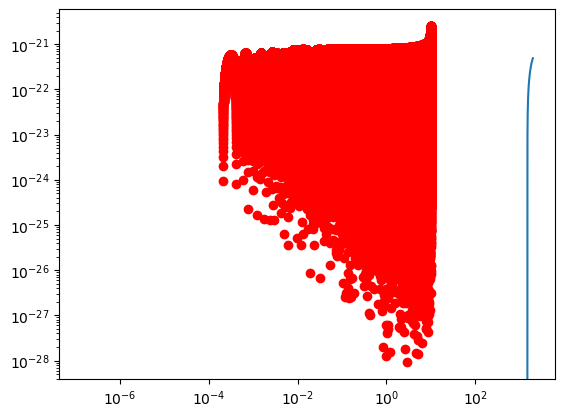

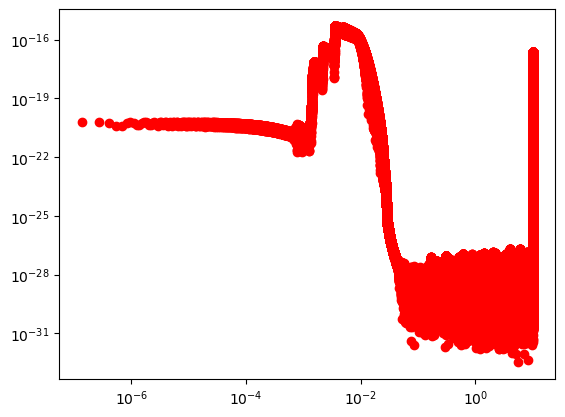

MemoryError: 

In [ ]:
import sys
import os

import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

from MOP_func import tukey
from MOP_func import inner_prod
from MOP_func import PSD_Lisa
from MOP_func import PSD_Taiji
from MOP_func import PSD_Tianqin
from MOP_func import PSD_armlength_dependent
from MOP_func import Find_zero
from MOP_func import E
from MOP_func import DL
from MOP_func import PSD_L_lambda
from MOP_func import SNR_for_diff_para
from MOP_func import SNR_M_D_L_l_residual
from MOP_func import htilde
from MOP_func import T_chirp
from MOP_func import final_frequency
use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

# set omp threads one of two ways
num_threads = 4

# this is the general way to set it for all computations
from few.utils.utility import omp_set_num_threads
omp_set_num_threads(num_threads)

few = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu,
    num_threads=num_threads,  # 2nd way for specific classes
)

gen_wave = GenerateEMRIWaveform("Pn5AAKWaveform")

# parameters
T = 0.5  # years
dt = 0.1  # seconds
M = 5e5
a = 0.98
mu = 50
p0 = 11.0
e0 = 0.1
x0 = 0.7  # notice this is x_I, not Y. The AAK waveform can convert to Y. 
qK = 0.2  # polar spin angle
phiK = 0.2  # azimuthal viewing angle
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal viewing angle
dist = 1# distance
Phi_phi0 = 1.0
Phi_theta0 = 2.0
Phi_r0 = 3.0

h = gen_wave(
    M,
    mu,
    a,
    p0,
    e0,
    x0,
    dist,
    qS,
    phiS,
    qK,
    phiK,
    Phi_phi0,
    Phi_theta0,
    Phi_r0,
    T=T,
    dt=dt,
)

plt.plot(h.real[:2000])
plt.show

# temp=h[:2000]
# h=temp
print(len(h))

para=np.array([M,mu,a,p0,e0,x0,dist,qS,phiS,qK,phiK,Phi_phi0,Phi_theta0,Phi_r0,T,dt])
print(para)
temp=str(para)
with open('parametersAAK_PN5.txt', 'w') as f:
    f.write(temp)

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft,fftfreq
import math
from math import pi as Pi



para=np.array([M,mu,a,p0,e0,x0,dist,qS,phiS,qK,phiK,Phi_phi0,Phi_theta0,Phi_r0,T,dt])
temp=para
#para=[float(x) for x in temp]
# temp=h[-10000:]
# h=temp
wave1 = np.array(h)
f = np.array(np.arange(len(h))/dt/ len(h))
plt.loglog(f,wave1.real,'ro')
plt.show()

tukey_seq=[tukey(i,len(h),1/8) for i in range(0,len(h))]
wave1 = tukey_seq*wave1

waveform1 = fft(wave1)
waveform2 = np.column_stack((waveform1, f))
temp=waveform2.real*waveform2.real+waveform2.imag*waveform2.imag
waveform = np.sqrt(temp)


plt.loglog(f, np.abs(waveform1), 'ro')
plt.show()

np.savetxt("waveform.txt", waveform, fmt="%50.50f", delimiter=" ")

import re
with open('waveform.txt', 'r') as f:
    text = f.read()
    patn = re.sub(r"[\([{})\]]", "", text)

with open('waveformAAK_PN5.txt', 'w') as f:
    f.write(patn)



In [ ]:
M_final=10**5
L1=2*10**9
L2=21*10**8
dL=1*10**8
l1=200
l2=1200
dl=50
#test
# L1=18*10**8
# L2=2.5*10**9
# dL=1*10**8
# l1=200
# l2=1200
# dl=50

SNR_threshold=10
zseq=np.zeros((len(np.arange(L1,L2,dL)),len(np.arange(l1,l2,dl))))
i=0
j=0
for L in np.arange(L1,L2,dL):
    for l in np.arange(l1,l2,dl):
        f=lambda x:SNR_M_D_L_l_residual(M_final,L,l,SNR_threshold,x)-SNR_threshold
        zeropoint=Find_zero(f,0.00001,2,0.001,100000)
        if zeropoint>0:
            zseq[i][j]=zeropoint
        j=j+1
    j=0
    i=i+1
print(zseq)

In [ ]:
#选择一个质量计算探测距离随臂长关系
M_final=10**5
L1=8*10**9
L2=10*10**9
dL=1*10**8
l1=200
l2=1200
dl=50
#test
# L1=18*10**8
# L2=2.5*10**9
# dL=1*10**8
# l1=200
# l2=1200
# dl=50

SNR_threshold=10
zseq=np.zeros((len(np.arange(L1,L2,dL)),len(np.arange(l1,l2,dl))))
i=0
j=0
for L in np.arange(L1,L2,dL):
    for l in np.arange(l1,l2,dl):
        f=lambda x:SNR_M_D_L_l_residual(M_final,L,l,SNR_threshold,x)-SNR_threshold
        zeropoint=Find_zero(f,0.00001,2,0.001,100000)
        if zeropoint>0:
            zseq[i][j]=zeropoint
        j=j+1
    j=0
    i=i+1
np.savetxt("redshift5.txt",zseq,fmt="%50.50f",delimiter=" ")

L1=6*10**9
L2=8*10**9
dL=1*10**8
l1=200
l2=1200
dl=50
SNR_threshold=10
zseq=np.zeros((len(np.arange(L1,L2,dL)),len(np.arange(l1,l2,dl))))
i=0
j=0
for L in np.arange(L1,L2,dL):
    for l in np.arange(l1,l2,dl):
        f=lambda x:SNR_M_D_L_l_residual(M_final,L,l,SNR_threshold,x)-SNR_threshold
        zeropoint=Find_zero(f,0.00001,2,0.001,100000)
        if zeropoint>0:
            zseq[i][j]=zeropoint
        j=j+1
    j=0
    i=i+1
np.savetxt("redshift4.txt",zseq,fmt="%50.50f",delimiter=" ")

L1=4*10**9
L2=6*10**9
dL=1*10**8
l1=200
l2=1200
dl=50
SNR_threshold=10
zseq=np.zeros((len(np.arange(L1,L2,dL)),len(np.arange(l1,l2,dl))))
i=0
j=0
for L in np.arange(L1,L2,dL):
    for l in np.arange(l1,l2,dl):
        f=lambda x:SNR_M_D_L_l_residual(M_final,L,l,SNR_threshold,x)-SNR_threshold
        zeropoint=Find_zero(f,0.00001,2,0.001,100000)
        if zeropoint>0:
            zseq[i][j]=zeropoint
        j=j+1
    j=0
    i=i+1
np.savetxt("redshift3.txt",zseq,fmt="%50.50f",delimiter=" ")

L1=2*10**9
L2=4*10**9
dL=1*10**8
l1=200
l2=1200
dl=50
SNR_threshold=10
zseq=np.zeros((len(np.arange(L1,L2,dL)),len(np.arange(l1,l2,dl))))
i=0
j=0
for L in np.arange(L1,L2,dL):
    for l in np.arange(l1,l2,dl):
        f=lambda x:SNR_M_D_L_l_residual(M_final,L,l,SNR_threshold,x)-SNR_threshold
        zeropoint=Find_zero(f,0.00001,2,0.001,100000)
        if zeropoint>0:
            zseq[i][j]=zeropoint
        j=j+1
    j=0
    i=i+1
np.savetxt("redshift2.txt",zseq,fmt="%50.50f",delimiter=" ")

L1=1*10**8
L2=2*10**9
dL=1*10**8
l1=200
l2=1200
dl=50
SNR_threshold=10
zseq=np.zeros((len(np.arange(L1,L2,dL)),len(np.arange(l1,l2,dl))))
i=0
j=0
for L in np.arange(L1,L2,dL):
    for l in np.arange(l1,l2,dl):
        f=lambda x:SNR_M_D_L_l_residual(M_final,L,l,SNR_threshold,x)-SNR_threshold
        zeropoint=Find_zero(f,0.00001,2,0.001,100000)
        if zeropoint>0:
            zseq[i][j]=zeropoint
        j=j+1
    j=0
    i=i+1
np.savetxt("redshift1.txt",zseq,fmt="%50.50f",delimiter=" ")
redshift1=np.loadtxt(r'redshift1.txt')
redshift2=np.loadtxt(r'redshift2.txt')
redshift3=np.loadtxt(r'redshift3.txt')
redshift4=np.loadtxt(r'redshift4.txt')
redshift5=np.loadtxt(r'redshift5.txt')
redshift=np.row_stack((redshift1,redshift2,redshift3,redshift4,redshift5))
np.savetxt("redshift.txt",zseq,fmt="%50.50f",delimiter=" ")